# Coronavirus datasets

In [1]:
import pandas as pd           
import matplotlib.pyplot as plt

In [2]:
state = "Washington"

Some dataset options:
    - [NY Times Github](https://github.com/nytimes/covid-19-data/blob/master/us-states.csv)
    - [The Atlantic API](https://covidtracking.com/api#swaggerWrapper)
    - [Bing Github](https://raw.githubusercontent.com/microsoft/Bing-COVID-19-Data/master/data/Bing-COVID19-Data.csv)

------

## NY Times

Up to date (through prior day) and counts are consistant with other sources. Only contains count of cases and deaths.

In [3]:
state_data = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
state_data.date = pd.to_datetime(state_data.date)

In [4]:
state_data = state_data[state_data.state == state]

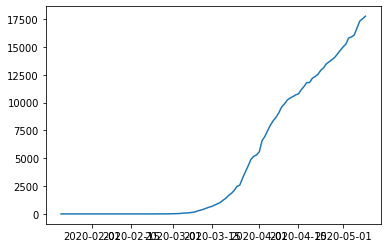

In [5]:
plt.plot(state_data.date, state_data.cases)
plt.show()

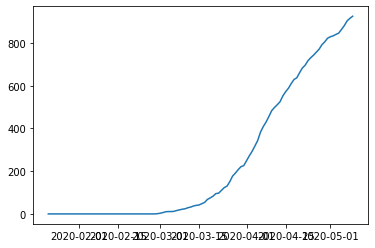

In [6]:
plt.plot(state_data.date, state_data.deaths)
plt.show()

-------------

## The Atlantic

Accessible through API calls so only download the necessary data. Allows period of time and filter by state.

In [7]:
import requests

state_abbr = "WA"

url = "https://covidtracking.com/api/v1/states/" + state_abbr + "/daily.json"
response = requests.get(url)
state_data = pd.read_json(response.content)
state_data.date = pd.to_datetime(state_data.date, format="%Y%m%d")

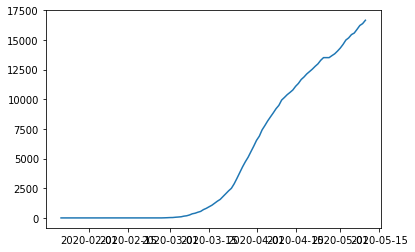

In [8]:
plt.plot(state_data.date, state_data.positive)
plt.show()

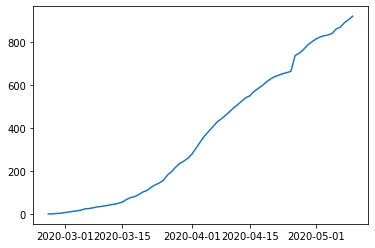

In [9]:
plt.plot(state_data.date, state_data.death)
plt.show()

-------------

## Bing

Data goes down to county level, also has daily changes already calculated. Includes recovere data which might make for some interesting visualizations as well. Contains a lot of data so download is a bit slower.

In [10]:
state_data = pd.read_csv("https://raw.githubusercontent.com/microsoft/Bing-COVID-19-Data/master/data/Bing-COVID19-Data.csv")
state_data = state_data[(state_data.AdminRegion1 == state) & (state_data.AdminRegion2.isnull())]

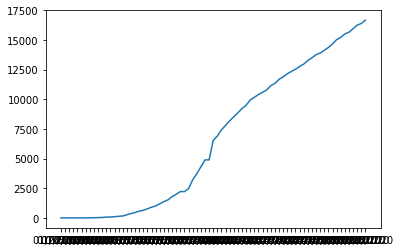

In [11]:
plt.plot(state_data.Updated, state_data.Confirmed)
plt.show()

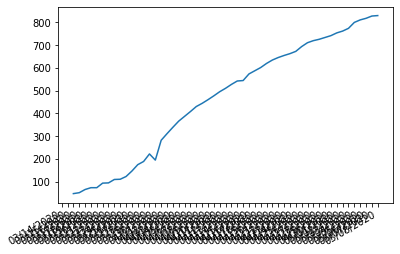

In [22]:
plt.plot(state_data.Updated, state_data.Deaths)
plt.show()